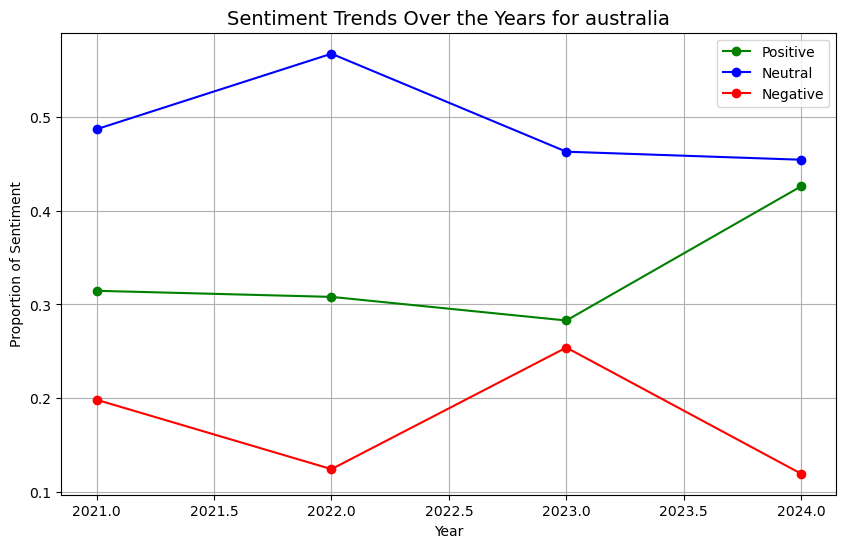

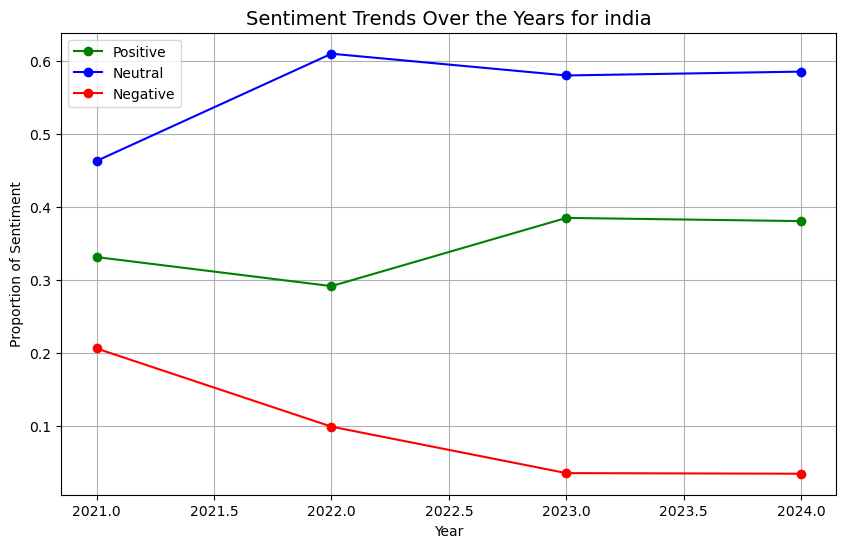

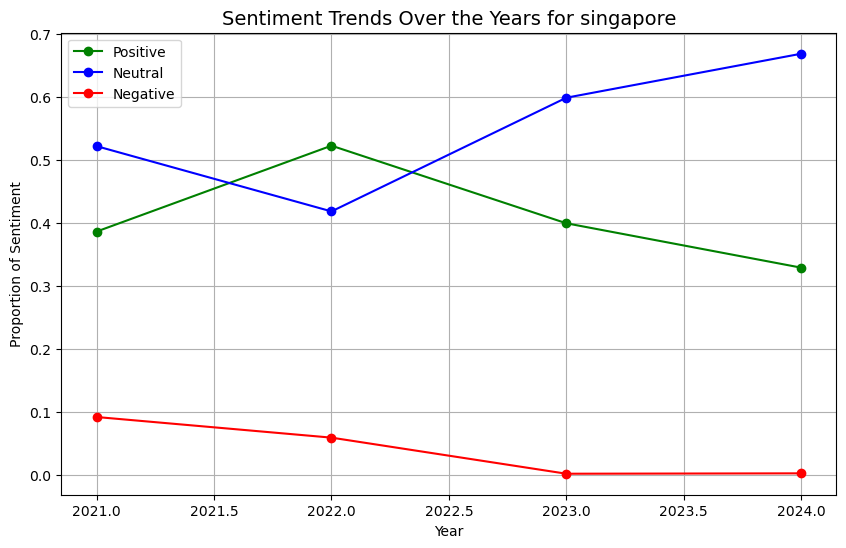

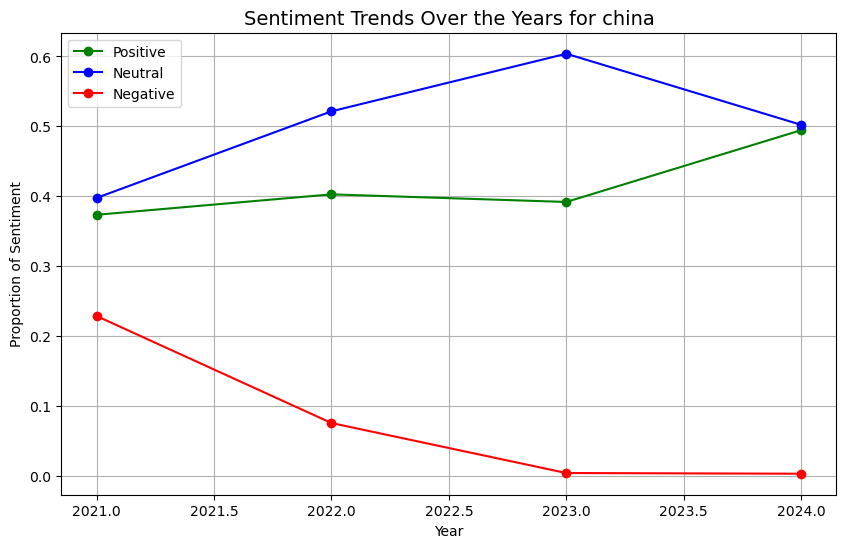

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'news_data_with_keywords.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Step 1: Convert the 'pubDate' to datetime format
# The format is 'day/month/year hour:minute:second AM/PM'
df['pubDate'] = pd.to_datetime(df['pubDate'], format='%d/%m/%Y %I:%M:%S %p')

# Step 2: Function to plot sentiment over time (yearly) for each country
def plot_sentiment_trends_yearly(df, country):
    # Filter data for the specific country
    df_country = df[df['country'] == country]
    
    # Group data by time (yearly) and aggregate sentiment values
    df_country_yearly = df_country.resample('Y', on='pubDate').sum()

    # Calculate proportions of positive, neutral, and negative sentiment
    df_country_yearly['positive_prop'] = df_country_yearly['positive'] / (df_country_yearly['positive'] + df_country_yearly['neutral'] + df_country_yearly['negative'])
    df_country_yearly['neutral_prop'] = df_country_yearly['neutral'] / (df_country_yearly['positive'] + df_country_yearly['neutral'] + df_country_yearly['negative'])
    df_country_yearly['negative_prop'] = df_country_yearly['negative'] / (df_country_yearly['positive'] + df_country_yearly['neutral'] + df_country_yearly['negative'])

    # Step 3: Plot the sentiment trends
    plt.figure(figsize=(10, 6))
    plt.plot(df_country_yearly.index.year, df_country_yearly['positive_prop'], label='Positive', color='green', marker='o')
    plt.plot(df_country_yearly.index.year, df_country_yearly['neutral_prop'], label='Neutral', color='blue', marker='o')
    plt.plot(df_country_yearly.index.year, df_country_yearly['negative_prop'], label='Negative', color='red', marker='o')

    plt.title(f'Sentiment Trends Over the Years for {country}', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Proportion of Sentiment')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Plot for all 4 countries
countries = ['australia', 'india', 'singapore', 'china']

for country in countries:
    plot_sentiment_trends_yearly(df, country)


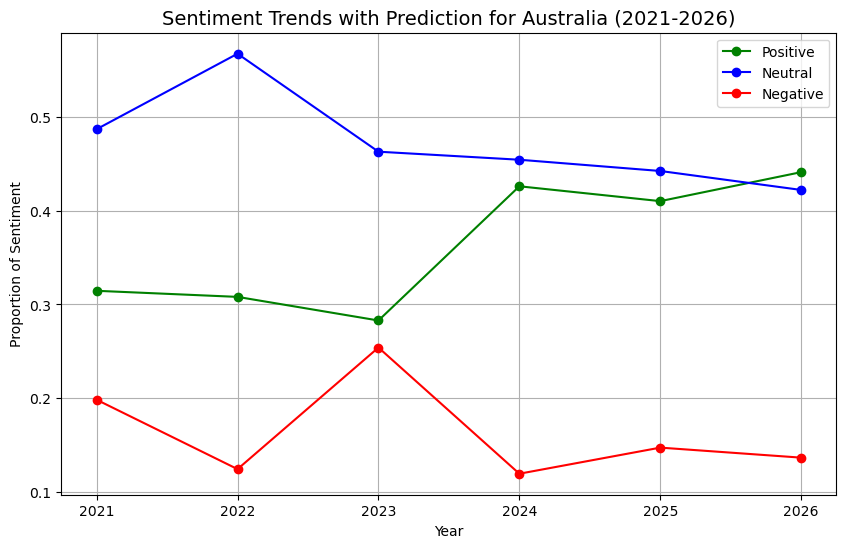

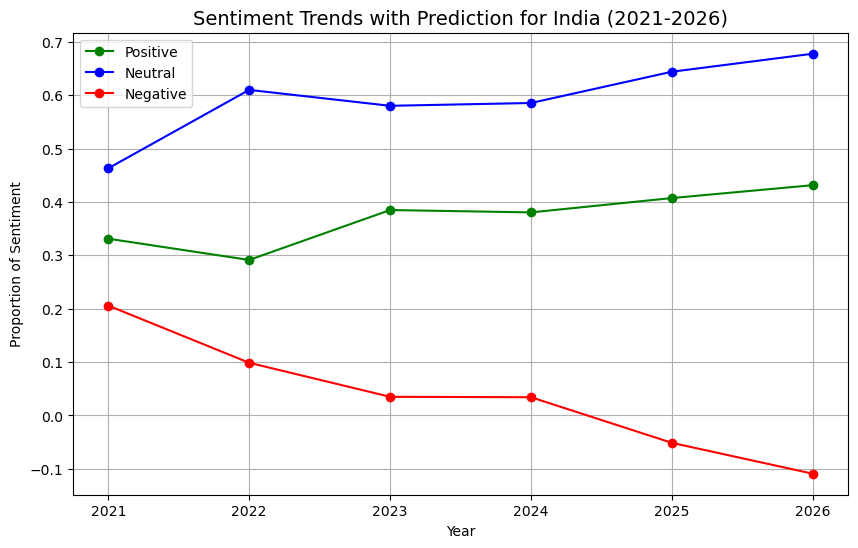

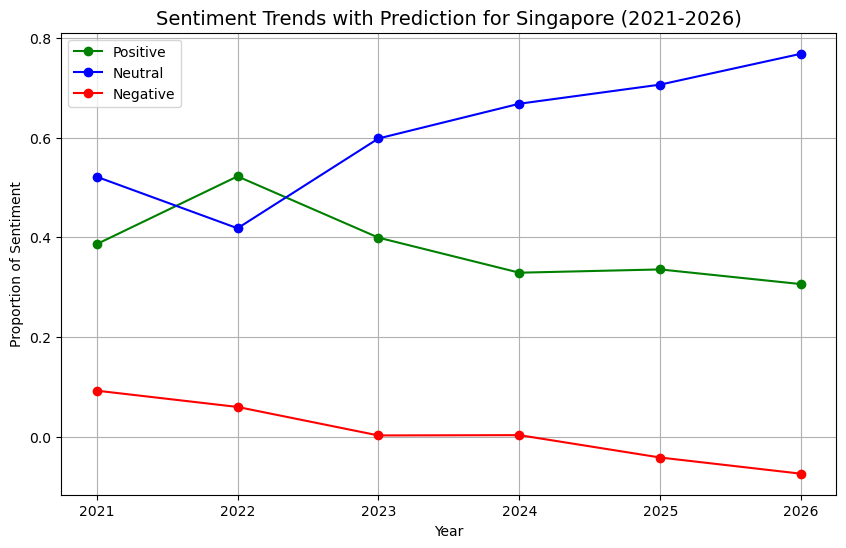

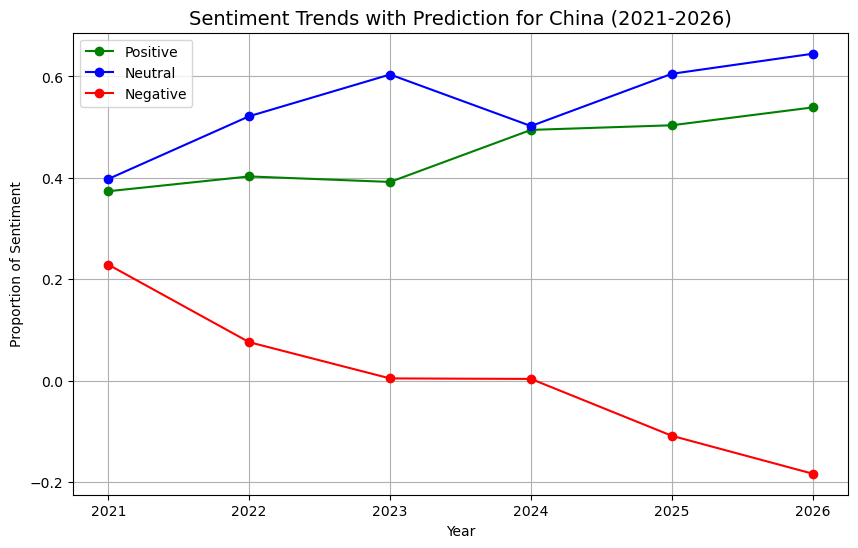

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the Excel file
file_path = 'news_data_with_keywords.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Step 1: Convert the 'pubDate' to datetime format
# The format is 'day/month/year hour:minute:second AM/PM'
df['pubDate'] = pd.to_datetime(df['pubDate'], format='%d/%m/%Y %I:%M:%S %p')

# Function to plot and predict sentiment trends yearly for each country
def plot_sentiment_trends_yearly_with_prediction(df, country):
    # Filter data for the specific country
    df_country = df[df['country'] == country]
    
    # Group data by time (yearly) and aggregate sentiment values
    df_country_yearly = df_country.resample('Y', on='pubDate').sum()

    # Calculate proportions of positive, neutral, and negative sentiment
    df_country_yearly['positive_prop'] = df_country_yearly['positive'] / (df_country_yearly['positive'] + df_country_yearly['neutral'] + df_country_yearly['negative'])
    df_country_yearly['neutral_prop'] = df_country_yearly['neutral'] / (df_country_yearly['positive'] + df_country_yearly['neutral'] + df_country_yearly['negative'])
    df_country_yearly['negative_prop'] = df_country_yearly['negative'] / (df_country_yearly['positive'] + df_country_yearly['neutral'] + df_country_yearly['negative'])
    
    # Prepare the data for modeling
    X = np.array(df_country_yearly.index.year).reshape(-1, 1)  # Years 2021, 2022, 2023, 2024
    years_future = np.array([2025, 2026]).reshape(-1, 1)  # Future years 2025, 2026

    # Step 2: Create models for each sentiment type
    model_positive = LinearRegression()
    model_neutral = LinearRegression()
    model_negative = LinearRegression()

    # Train the models
    model_positive.fit(X, df_country_yearly['positive_prop'])
    model_neutral.fit(X, df_country_yearly['neutral_prop'])
    model_negative.fit(X, df_country_yearly['negative_prop'])

    # Step 3: Predict future values
    positive_pred = model_positive.predict(years_future)
    neutral_pred = model_neutral.predict(years_future)
    negative_pred = model_negative.predict(years_future)

    # Append the predictions to the original data
    X_all = np.concatenate([X, years_future])
    positive_all = np.concatenate([df_country_yearly['positive_prop'].values, positive_pred])
    neutral_all = np.concatenate([df_country_yearly['neutral_prop'].values, neutral_pred])
    negative_all = np.concatenate([df_country_yearly['negative_prop'].values, negative_pred])

    # Step 4: Plot the historical and predicted data
    plt.figure(figsize=(10, 6))
    plt.plot(X_all, positive_all, label='Positive', color='green', marker='o')
    plt.plot(X_all, neutral_all, label='Neutral', color='blue', marker='o')
    plt.plot(X_all, negative_all, label='Negative', color='red', marker='o')

    plt.title(f'Sentiment Trends with Prediction for {country.capitalize()} (2021-2026)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Proportion of Sentiment')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Plot and predict for all 4 countries
countries = ['australia', 'india', 'singapore', 'china']

for country in countries:
    plot_sentiment_trends_yearly_with_prediction(df, country)
